# Bibliothéque

In [29]:
# Importation des bibliothèques nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


# Chargement des données

In [30]:
# Chargement des données
# Assurez-vous que votre fichier CSV est dans le même répertoire que votre script Python
data = pd.read_csv('sales_data.csv')

# Préparation des données

In [31]:
# Préparation des données
# Remplacez 'feature_cols' par les colonnes de votre jeu de données que vous souhaitez utiliser comme caractéristiques
feature_cols = ['Unit price', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']
X = data[feature_cols]
y = data['Quantity']

# Conversion variable continus en variable catégorielle pour utiliser la classification

In [32]:
# Création des limites des intervalles
bins = [0, 5, 10, float('inf')]

# Création des labels pour chaque intervalle
labels = ['Faible', 'Moyen', 'Élevé']

# Transformation de la variable continue en variable catégorielle
data['Quantity_cat'] = pd.cut(data['Quantity'], bins=bins, labels=labels)


In [33]:
y = data['Quantity_cat']

# Normalisation des données

In [34]:
# Normalisation des données
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [35]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Création du modèle de régression logistique
model = LogisticRegression()

In [37]:
# Entraînement du modèle
model.fit(X_train, y_train)

LogisticRegression()

In [38]:
# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Metrics

Accuracy:  0.995
Confusion Matrix:  [[100   0]
 [  1  99]]
Precision:  0.995049504950495
Recall:  0.995
F1 Score:  0.9949998749968749
Specificity:  1.0


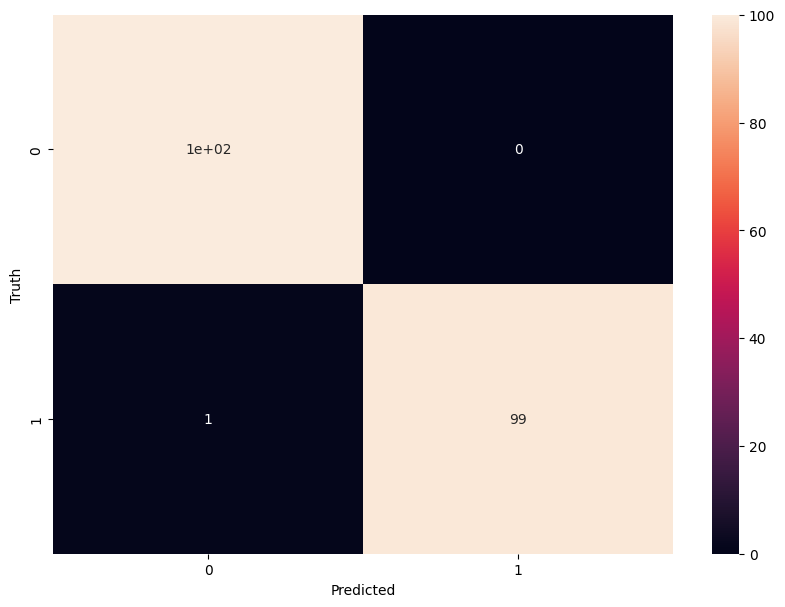

In [41]:
# Calcul de l'accuracy
print('Accuracy: ', accuracy_score(y_test, y_pred))

# Calcul de la matrice de confusion
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))

# Calcul de la précision
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: ', precision)

# Calcul du rappel
recall = recall_score(y_test, y_pred, average='macro')
print('Recall: ', recall)

# Calcul du score F1
f1 = f1_score(y_test, y_pred, average='macro')
print('F1 Score: ', f1)




# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Calcul de la spécificité
TN = cm[0][0]
FP = cm[0][1]
specificity = TN / (TN + FP)
print('Specificity: ', specificity)

# Représentation de la matrice de confusion
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [15]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from tkinter import *

In [42]:
# Création de la fenêtre principale
window = Tk()
window.title("Test du modèle de régression logistique")
window.geometry("400x200")

# Création du label d'instruction
label = Label(window, text="Entrez le nom d'un produit:", font=("Arial", 12))
label.pack(pady=10)

# Création de l'entrée du nom du produit
entry = Entry(window, width=30)
entry.pack()

# Création du label de résultat
result = Label(window, text="", font=("Arial", 14), bg="white")
result.pack(pady=10, fill=BOTH, expand=True)

# Fonction pour prédire la quantité du produit
def predict():
    # Récupération du nom du produit
    product = entry.get()
    
    # Vérification si le produit existe dans les données
    if product in data["Product line"].unique():
        # Extraction des caractéristiques du produit
        features = data[data["Product line"] == product][feature_cols].iloc[0]
        
        # Prédiction de la quantité du produit
        quantity = model.predict([features])[0]
        
        # Définition de la couleur du résultat selon la quantité
        if quantity == "Élevé":
            color = "green"
        elif quantity == "Moyen":
            color = "orange"
        else:
            color = "red"
        
        # Affichage du résultat
        result.config(text=f"La quantité du produit {product} est {quantity}", bg=color)
    else:
        # Affichage d'un message d'erreur si le produit n'existe pas
        result.config(text=f"Le produit {product} n'est pas dans les données", bg="white")

# Création du bouton de prédiction
button = Button(window, text="Prédire", command=predict)
button.pack(pady=10)

# Lancement de la boucle principale
window.mainloop()